# Data Calibration
The calibration process to determine the value that can be used as the RSSI reference value at a distance of 1 meter. In this experiment, there are **5 beacons tested **10x each beacon***.

In [1]:
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

beacon_a = [-86, -86, -85, -86, -86, -87, -85, -86, -87, -87]
beacon_b = [-86, -84, -84, -84, -84, -86, -85, -82, -84, -86]
beacon_c = [-81, -85, -81, -84, -82, -81, -81, -84, -84, -81]
beacon_d = [-82, -82, -80, -81, -84, -80, -82, -84, -82, -80]
beacon_e = [-86, -86, -86, -87, -85, -86, -88, -86, -85, -88]

## Data Analysis

### Point Estimation
The evaluation process through point estimation approach to obtain a single value that can be used as the RSSI reference value. *This process evaluates through **Mean**, **Median**, and **Standard Deviation***. Standard deviation shows how diverse the data is or how wide the data distribution from the test results is. *The lower the standard deviation, the more stable the test data and can be used as a reference value*.

In [2]:
# Calculating mean, median, and standard deviation
means = [np.mean(beacon_a), np.mean(beacon_b), np.mean(beacon_c), np.mean(beacon_d), np.mean(beacon_e)]
medians = [np.median(beacon_a), np.median(beacon_b), np.median(beacon_c), np.median(beacon_d), np.median(beacon_e)]
std_devs = [np.std(beacon_a), np.std(beacon_b), np.std(beacon_c), np.std(beacon_d), np.std(beacon_e)]

output_mms = [means, medians, std_devs]
labels = ["Beacon A", "Beacon B", "Beacon C", "Beacon D", "Beacon E"]

for index, label in enumerate(labels):
    print(label)
    print(f"Mean: {output_mms[0][index]}\t Median: {output_mms[1][index]}\t Std: {output_mms[2][index]:.4f}")

Beacon A
Mean: -86.1	 Median: -86.0	 Std: 0.7000
Beacon B
Mean: -84.5	 Median: -84.0	 Std: 1.2042
Beacon C
Mean: -82.4	 Median: -81.5	 Std: 1.5620
Beacon D
Mean: -81.7	 Median: -82.0	 Std: 1.4177
Beacon E
Mean: -86.3	 Median: -86.0	 Std: 1.0050


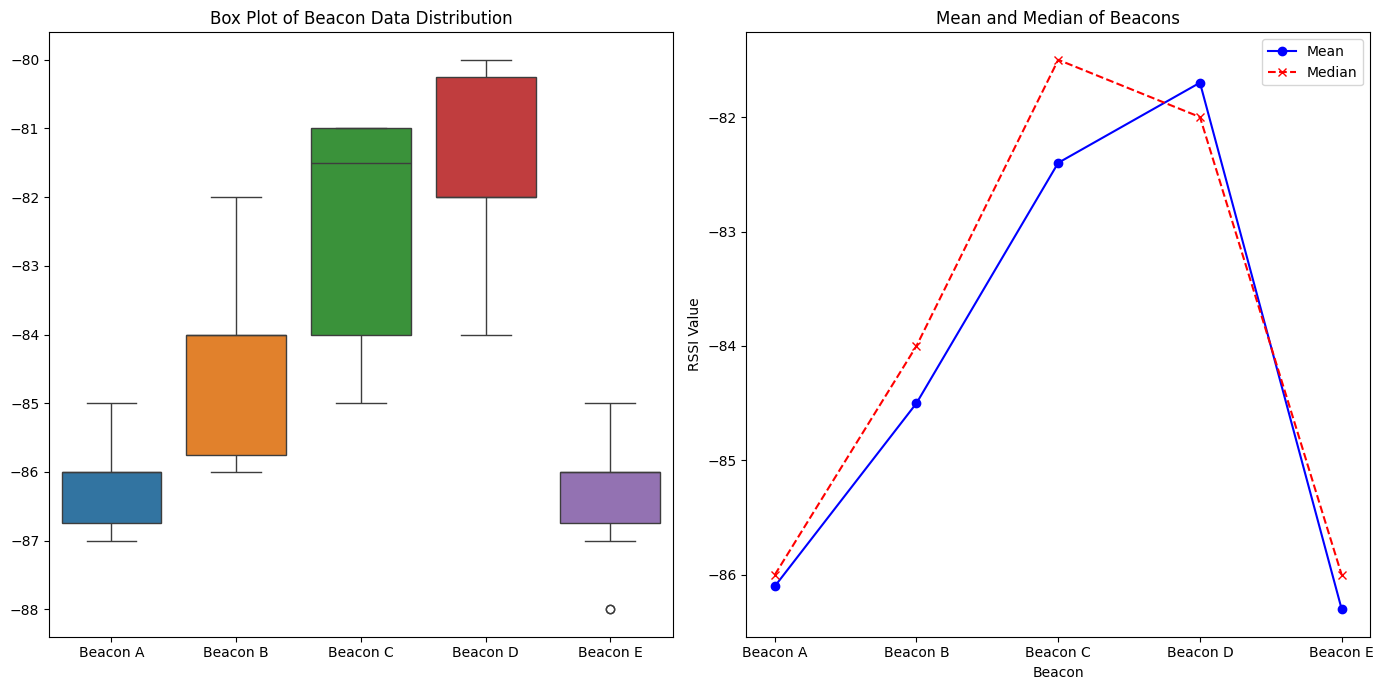

In [3]:
# Visualization
plt.figure(figsize=(14, 7))

# Box plot for data distribution
plt.subplot(1, 2, 1)
sns.boxplot(data=[beacon_a, beacon_b, beacon_c, beacon_d, beacon_e])
plt.xticks([0, 1, 2, 3, 4], ['Beacon A', 'Beacon B', 'Beacon C', 'Beacon D', 'Beacon E'])
plt.title('Box Plot of Beacon Data Distribution')

# Line plot for mean and median
plt.subplot(1, 2, 2)
x = np.arange(5)
plt.plot(x, means, marker='o', linestyle='-', color='b', label='Mean')
plt.plot(x, medians, marker='x', linestyle='--', color='r', label='Median')
plt.xticks(x, ['Beacon A', 'Beacon B', 'Beacon C', 'Beacon D', 'Beacon E'])
plt.title('Mean and Median of Beacons')
plt.xlabel('Beacon')
plt.ylabel('RSSI Value')
plt.legend()
plt.tight_layout()
plt.show()

Plotting process using Box Plot to understand how data distribution occurs and to see the outliers. In this process, it was found *there is an outlier in the test data of Beacon E*. Previously, it had a relatively small standard deviation along with Beacons A and B which might be used as one of the RSSI reference values. *The presence of this outlier proves that 1 test value with a low standard deviation is not enough*, a larger value is needed to cover the five beacons. **To address this issue, a mean value method is used by considering or adding a larger class weight for a smaller standard deviation value**.

In [4]:
# Using Weighted Average
weights = [1/std_devs[0], 1/std_devs[1], 1/std_devs[2], 1/std_devs[3], 1/std_devs[4]]
weighted_mean = np.average([means[0], means[1], means[2], means[3], means[4]], weights=weights)
print(f"Weight Considerations: {weights}\nWeighted Mean: {weighted_mean:.4f}")

Weight Considerations: [np.float64(1.4285714285714284), np.float64(0.8304547985373997), np.float64(0.6401843996644799), np.float64(0.7053456158585982), np.float64(0.9950371902099893)]
Weighted Mean: -84.6647


### Range Estimation
Based on the values obtained in the point estimation process, it can be further developed into range estimation to determine the scope of values that can be used as RSSI reference values. This range estimation process uses a 95% confidence level and a Z_score approach since the standard deviation values were previously known. Thus, the upper and lower bounds of values that can be used as RSSI reference values within a 1-meter range or the margin of error from the point estimation used will be known.

In [5]:
# Number of samples from each beacon
sample_sizes = [10, 10, 10, 10, 10]

# Calculate the standard error
n = sum(sample_sizes)
weighted_std_dev = np.sqrt(sum([(std_dev**2) * (n_i / n) for std_dev, n_i in zip(std_devs, sample_sizes)]))
standard_error = weighted_std_dev / np.sqrt(n)

# Set confidence level (e.g., 95%)
confidence_level = 0.95
z_score = stats.norm.ppf(1 - (1 - confidence_level) / 2)

# Calculate margin of error and confidence interval
margin_of_error = z_score * standard_error
lower_bound = weighted_mean - margin_of_error
upper_bound = weighted_mean + margin_of_error

print(f"Confidence Level: {confidence_level * 100}%")
print(f"Margin of Error: {margin_of_error}")
print(f"Confidence Interval: ({lower_bound}, {upper_bound})")

Confidence Level: 95.0%
Margin of Error: 0.33720495413404905
Confidence Interval: (-85.00187739213361, -84.3274674838655)
